# K Means Clustering Algorithums Implementation

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [5]:
X

array([[-7.55568101, -5.27498632],
       [ 2.89355243,  3.30096154],
       [-9.41533071, -2.7024256 ],
       ...,
       [-0.10383663, -4.16603386],
       [-1.17498576, -3.61824237],
       [-7.5802055 , -6.29405604]])

In [6]:
y

array([1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 1, 2, 0, 0, 1, 0, 2,
       2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 0, 1, 1, 1, 1, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 0, 1, 0, 0, 0, 2, 2, 1, 2, 0, 1, 2,
       0, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 2, 2, 2, 0, 2, 1, 0, 1, 0, 0, 2,
       2, 0, 2, 0, 1, 1, 0, 0, 2, 1, 0, 1, 2, 0, 0, 2, 2, 1, 0, 1, 0, 0,
       0, 2, 1, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 2, 1, 1, 2, 1, 0, 0, 1, 1, 2, 0, 1, 2, 1, 1, 0, 0, 2, 0, 2, 1,
       0, 0, 0, 0, 2, 0, 2, 0, 1, 1, 0, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 2, 2, 0, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 2,
       1, 0, 1, 0, 2, 1, 0, 2, 1, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 1, 2, 2,
       0, 1, 1, 2, 1, 0, 2, 0, 2, 2, 2, 2, 0, 1, 2, 1, 2, 0, 2, 1, 2, 0,
       1, 1, 0, 2, 0, 0, 1, 0, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2,
       0, 0, 2, 0, 0, 0, 1, 1, 0, 2, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 1, 2,
       0, 1, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1, 0, 0, 0,

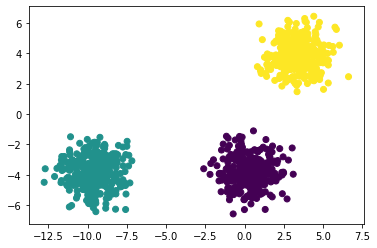

In [7]:
plt.scatter(X[:,0],X[:,1],c=y)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [11]:
from sklearn.cluster import KMeans

In [13]:
#Elbow method to select the K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [14]:
wcss

[31362.22806970929,
 8877.818434440984,
 1302.4766299736273,
 1148.0556421716926,
 1005.215522209199,
 870.5450167425242,
 743.7852396512781,
 636.8516792510956,
 548.4701101583984,
 508.4029167630727]

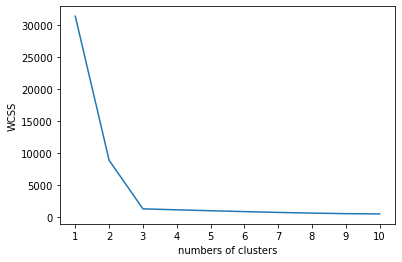

In [16]:
#plot elow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("numbers of clusters")
plt.ylabel("WCSS")
plt.show()

In [17]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [20]:
y_labels=kmeans.fit_predict(X_train)

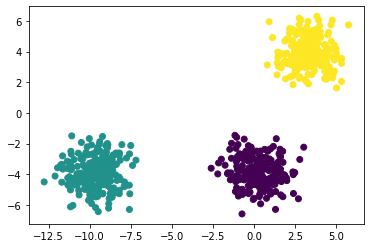

In [21]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [22]:
#knee locator
!pip install kneed

Defaulting to user installation because normal site-packages is not writeable


In [26]:
from kneed import KneeLocator

In [27]:
k1=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [28]:
k1.elbow

3

# Hierarichal Clustering Implementation

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn import datasets

In [9]:
#import iris dataset
iris=datasets.load_iris()

In [10]:
iris_data=pd.DataFrame(iris.data)

In [11]:
iris_data.columns=iris.feature_names

In [12]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
#Standardization 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()





In [14]:
X_scaled=scaler.fit_transform(iris_data)

In [15]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [21]:
X_scaled.shape

(150, 4)

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca=PCA(n_components=2)

In [18]:
pca_scaled=pca.fit_transform(X_scaled)

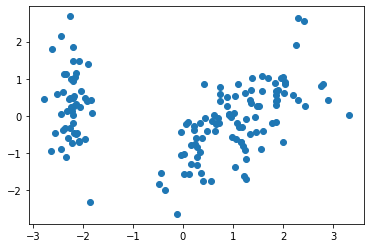

In [23]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

Text(0, 0.5, 'Eucledian Distance')

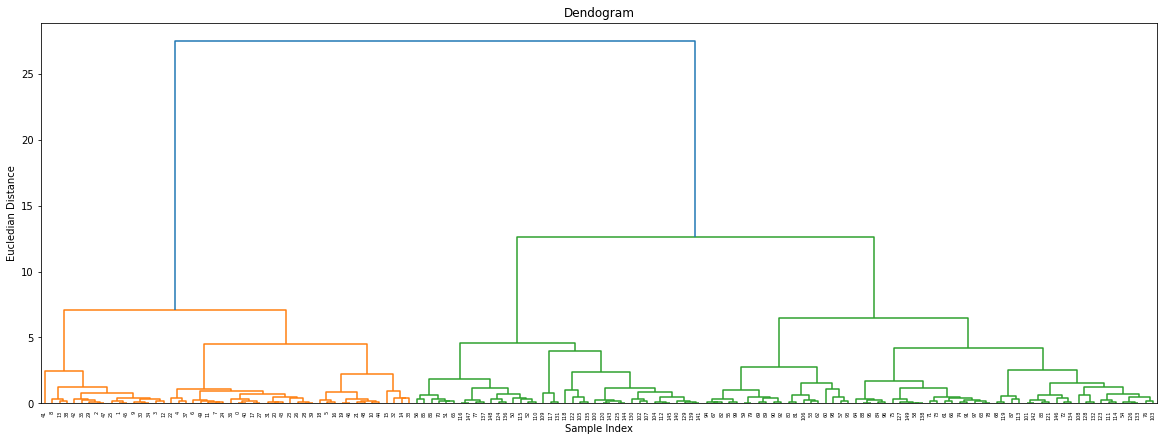

In [26]:
#agglomerative Clustering
import scipy.cluster.hierarchy as sc #in sc method there is dendogram 
plt.figure(figsize=(20,7))
plt.title("Dendograms")

#Create dendogram
sc.dendrogram(sc.linkage(pca_scaled,method='ward')) #this line is fix for all are same 
plt.title('Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Eucledian Distance')

In [29]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [30]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

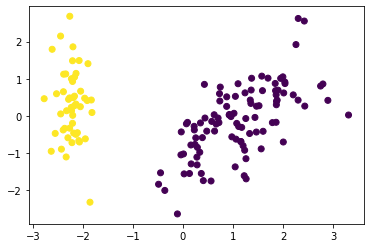

In [31]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

# DBSCAN Clustering

In [32]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
X,y=make_moons(n_samples=250,noise=0.15)

In [40]:
X

array([[ 0.94813069,  0.70440106],
       [ 1.18549131, -0.41515774],
       [ 0.21833027,  0.09271446],
       [ 0.34452833, -0.35556226],
       [-1.16892861,  0.18412161],
       [ 1.05546078,  0.20014173],
       [ 1.32630937, -0.40408433],
       [-0.07171892,  1.33839947],
       [ 1.06406387,  0.3842719 ],
       [ 2.08488634,  0.23116668],
       [ 0.04233688,  0.43023912],
       [-0.96505328,  0.45609165],
       [-1.01883266,  0.29821164],
       [ 0.14802278,  0.07492628],
       [ 0.88005934,  0.3001794 ],
       [ 0.85614259,  0.65791194],
       [ 1.71743149, -0.11836832],
       [ 1.04796862,  0.57018515],
       [ 0.16537846, -0.0687761 ],
       [-1.18054295,  0.21970036],
       [ 1.25628907, -0.31258834],
       [ 1.79498485, -0.18875159],
       [ 1.39531239, -0.30475823],
       [ 0.02221745,  0.98710764],
       [-0.70716913,  0.59940331],
       [ 0.06671675,  1.06293303],
       [-0.48871945,  0.8267996 ],
       [ 0.56947414,  0.52284163],
       [-0.24720453,

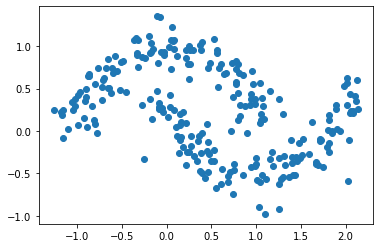

In [41]:
plt.scatter(X[:,0],X[:,1])

In [42]:
#feature ScalingStandard Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [43]:
X_scaled=scaler.fit_transform(X)

In [44]:
X_scaled

array([[ 5.12110532e-01,  9.24240527e-01],
       [ 7.80554586e-01, -1.25951231e+00],
       [-3.13260526e-01, -2.68883354e-01],
       [-1.70536263e-01, -1.14326848e+00],
       [-1.88218717e+00, -9.05893504e-02],
       [ 6.33495977e-01, -5.93413551e-02],
       [ 9.39813399e-01, -1.23791310e+00],
       [-6.41292957e-01,  2.16088467e+00],
       [ 6.43225682e-01,  2.99813330e-01],
       [ 1.79772943e+00,  1.17429864e-03],
       [-5.12301032e-01,  3.89474592e-01],
       [-1.65161345e+00,  4.39901172e-01],
       [-1.71243549e+00,  1.31948681e-01],
       [-3.92775092e-01, -3.03580055e-01],
       [ 4.35124938e-01,  1.35786899e-01],
       [ 4.08076173e-01,  8.33561284e-01],
       [ 1.38215472e+00, -6.80610397e-01],
       [ 6.25022683e-01,  6.62446001e-01],
       [-3.73146612e-01, -5.83878392e-01],
       [-1.89532246e+00, -2.11913120e-02],
       [ 8.60623635e-01, -1.05944580e+00],
       [ 1.46986403e+00, -8.17896324e-01],
       [ 1.01785268e+00, -1.04417280e+00],
       [-5.

In [47]:
dbcan=DBSCAN(eps=0.3)

In [48]:
dbcan.fit(X_scaled)

DBSCAN(eps=0.3)

In [49]:
dbcan.labels_

array([ 0,  1,  1,  1,  0,  0,  1, -1,  0,  1,  1,  0,  0,  1,  0,  0,  1,
        0,  1,  0,  1,  1,  1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  1,  0,
        0,  1,  0,  0,  1,  0,  1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  1,  1,  0,  1,  1,  0,  0,  0,  1,  1,  1,  1,
        0,  0,  0,  1,  1,  1,  0,  0,  0,  1,  0,  1,  0,  0,  1,  0,  0,
        0,  1,  0,  0,  1,  0,  1,  1,  1,  1,  1,  1,  0,  1,  0,  1,  1,
        1,  1,  1,  0,  1,  1,  0,  0,  0,  0,  0, -1,  0,  0,  1,  1,  1,
        0,  1,  0,  0,  1,  0,  0,  1,  1, -1,  1,  0,  0,  1,  0,  1,  1,
        1,  0,  0,  0, -1,  1,  0,  1,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  0,  1,  1,  0,  1,  1,  0,  1,  0,  0,  1,  1,  1,  1,  0,  1,
        1,  1,  0,  1,  0,  1,  0,  0,  1,  1,  0,  0,  1,  0,  0,  1,  0,
        0,  1,  0,  1,  1,  0,  1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,
        1,  1,  0,  0,  0, -1,  1, -1,  0,  1,  1,  1,  1, -1,  0,  1,  0,
        1,  0,  0,  1,  0

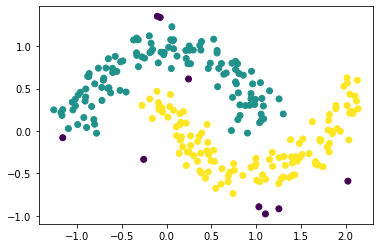

In [50]:
plt.scatter(X[:,0],X[:,1],c=dbcan.labels_) #we can see noise(outlires)

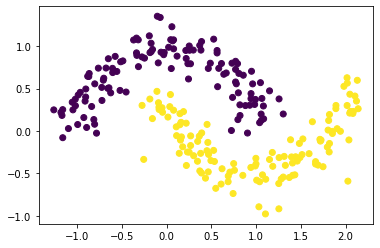

In [51]:
plt.scatter(X[:,0],X[:,1],c=y) #this is simple graf